2019-02-04: INSeq Klebsiella Report
===================================

## Purpose

* This notebook will contain an overview of the analysis done on INSeq data from a colonization experiment of *Klebsiella Pneumonia*

### Computational Experiments:

1. Pyinseq - gave a table with hits per gene in every sample, this was used in analysis
2. DESeq Statistical Analysis - did statistical test taking into consideration the behavior of count data produced from high-throughput sequencing experiments.

### Import summary gene table data

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from bokeh.io import output_notebook, show, push_notebook
from bokeh.plotting import figure, output_file
from bokeh.models import *
from bokeh.layouts import column, row, gridplot

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, widgets
output_notebook()

Loading BokehJS ...

* Summary gene table contains the output results from the pyinseq run. 

In [116]:
summary_df = pd.read_csv("2019-01-31_E1004_renamed.txt", sep='\t')
summary_df.head(1)

,Contig,Start,End,Strand,Length,PID,Gene,Synonym,Code,COG,Product,ket/xyl_E1004_01,ket/xyl_E1004_03,ket/xyl_E1004_04,propofol_E1004_05,propofol_E1004_06,propofol_E1004_08,input_E1004_13,input_E1004_14,input_E1004_15
0,CP009208,15,227,+,213,AIK78632.1,-,VK055_0001,-,-,lambda phage tail tape-measure family protein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Sample correlation was performed using **spearman correlation
** Less sensitive to outliers

* As expected,

<img src="2019-01-31_E1004_spearman_heatmap.png" width=600>

### And a T50 Test
Counts how many hits made up for than 50% of all hits in the sample. Is used to show if there is a bottleneck in the INSeq experiment

In [115]:
with open("experiments/2018-10-26_pyinseq-runs/klebsiella-disruption_09/log.txt") as log:
    nfifty_d = {}
    for line in log:
        if "N50" in line.split(" "):
            line = line.split(" ")
            if len(line) == 10:
                pass
            else:
                sample = line[10].replace(":","")
                n50 = line[11].replace("\n", "")
                nfifty_d[sample] = int(n50)

fig_T50, ax_T50 = plt.subplots()
fig_T50.set_size_inches(10,8)

# Set x labels
ax_T50.set_xticks(range(len(nfifty_d)))
ax_T50.set_xticklabels(list(nfifty_d.keys()))

ax_T50.bar(range(len(nfifty_d)), list(nfifty_d.values()), align='center')

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/2018-10-26_pyinseq-runs/klebsiella-disruption_09/log.txt'

##### Conclusion
* No significant bottleneck was observed

### DESeq statistical analysis with Fold-Change and pvalue calculations
* After samples were processed by Pyinseq and hits were mapped to correspondent gene, the count table was submitted to the DESeq pipeline. Even though DESeq was orginally meant for studying differentially expressed genes by using RNA-Seq, the statistical tools it uses can be easily implemented for INSeq experiments since the data behaves the same way. This way we can normalize the data to avoid any bias by low-count genes and errors in the sequencing process. 

It outputs a p-adjusted value which uses Benjamini-Hochberg procedure to recude false true discoveries (Type-1 Errors). Also includes log2FC using input as the denominator of the ratio.

In [2]:
deseq_df = pd.read_csv("2019-01-31_deseq_table_results.txt", sep='\t')
columns = list(deseq_df.columns[2:])
deseq_df.set_index("Synonym").sort_values("Ketamine log10FC").head()

,Gene,baseMean,Ketamine log2FC,Ketamine stat,Ketamine padj,Ketamine log10FC,Propofol log2FC,Propofol stat,Propofol padj,Propofol log10FC,ket/xyl_E1004_01,ket/xyl_E1004_03,ket/xyl_E1004_04,propofol_E1004_05,propofol_E1004_06,propofol_E1004_08,input_E1004_13,input_E1004_14,input_E1004_15
Synonym,,,,,,,,,,,,,,,,,,,
VK055_0780,trxA,32.471475,-17.429631,-4.639938,NaN,-5.246842,5.872056,1.645712,NaN,1.767665,0.0,0.000000,0.0,222.528406,0.000000,0.000000,2.679395,2.954189,1.664806
VK055_3206,ilvE,121.363033,-10.805626,-7.928247,4.626357e-12,-3.252818,-10.820083,-7.938854,2.260000e-12,-3.257169,0.0,0.000000,0.0,0.000000,0.000000,0.000000,517.264259,395.284941,415.333012
VK055_1782,tolB,101.861075,-10.552910,-7.662202,1.902195e-11,-3.176742,-10.567366,-7.672699,1.490000e-11,-3.181094,0.0,0.000000,0.0,0.000000,0.000000,0.000000,400.075982,406.453218,306.758680
VK055_3852,gltD,86.905739,-10.323859,-7.438755,8.462429e-11,-3.107791,-10.338316,-7.449172,6.930000e-11,-3.112143,0.0,0.000000,0.0,0.000000,0.000000,0.941116,297.060295,349.314873,313.055991
VK055_3853,-,423.441914,-10.160819,-10.373549,1.361901e-21,-3.058711,-7.009499,-12.018142,1.260000e-29,-2.110070,0.0,1.569592,0.0,0.000000,8.603713,10.714247,1632.668199,1489.704002,1497.819104


### Previously selected genes
* Previous genes were selected based on the fold-change regarding the input count values. However, after running both Mann-Whitney test and a Wald T-Test, from DESeq, many were shown to be statistically non-significant.

,Gene,baseMean,Ketamine log2FC,Ketamine stat,Ketamine padj,Ketamine log10FC,Propofol log2FC,Propofol stat,Propofol padj,Propofol log10FC,ket/xyl_E1004_01,ket/xyl_E1004_03,ket/xyl_E1004_04,propofol_E1004_05,propofol_E1004_06,propofol_E1004_08,input_E1004_13,input_E1004_14,input_E1004_15
Synonym,,,,,,,,,,,,,,,,,,,
VK055_4268,-,249.877234,-0.007580,-0.017447,0.993238,-0.002282,0.159189,0.366730,0.899705,0.047921,211.980929,226.119278,145.085472,192.125824,243.771868,299.854134,312.925134,282.305213,282.003732
VK055_2084,-,38.211105,-3.809187,-2.544158,0.098706,-1.146679,-3.171606,-2.137430,0.209131,-0.954749,18.226091,0.000000,0.000000,20.807851,0.000000,0.506755,60.779961,139.927699,157.649930
VK055_3202,ilvC,206.286124,-6.809364,-2.934546,0.047139,-2.049823,-8.416148,-3.534346,0.011097,-2.533513,0.000000,0.000000,14.865315,0.000000,3.750336,0.000000,922.699031,654.028693,653.400331
VK055_3875,yrbC,92.208836,-4.222218,-4.660259,0.000173,-1.271014,-5.156003,-5.523902,0.000004,-1.552112,6.075364,0.588597,25.568341,7.398347,3.456192,3.692072,284.791486,317.323164,338.969065
VK055_0094,-,76.992425,-1.774010,-2.637808,0.084520,-0.534030,1.540464,2.407676,0.134547,0.463726,5.746966,16.578810,13.845979,87.046176,204.650711,156.587275,70.510395,54.832636,75.495352
VK055_1993,-,30.485568,-3.079750,-2.961974,0.044807,-0.927097,0.460438,0.480212,0.853197,0.138606,0.000000,9.908046,0.000000,39.766115,38.018116,50.385919,40.402456,45.825961,48.786067
VK055_4623,glnB,65.778965,-2.701238,-3.553712,0.009945,-0.813154,0.421214,0.583049,0.819955,0.126798,11.658130,11.771936,10.787971,121.147932,31.914628,115.612519,109.996216,90.138801,89.682398
VK055_1398,-,16.053312,1.700797,1.340292,0.473628,0.511991,-2.719552,-1.901192,0.287824,-0.818667,10.098239,37.768296,50.202291,0.000000,0.000000,5.067549,19.954442,10.159529,11.581262
VK055_1930,fepC,8.216274,-0.805784,-0.524374,0.812789,-0.242565,-3.071439,-1.866239,0.301078,-0.924595,15.352608,0.000000,0.000000,0.000000,2.132544,0.000000,10.435538,21.760126,21.787249


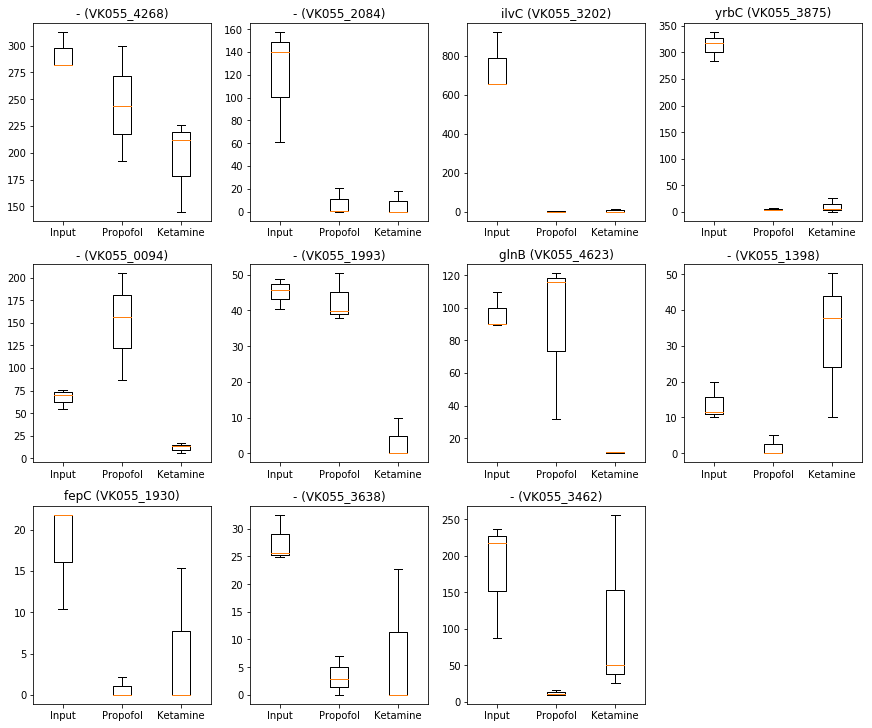

In [65]:
previous_genes = [gene.replace("\n","") for gene in open("genesOfInterest.txt")]
previous_genes = deseq_df.set_index("Synonym").loc[previous_genes]

fig_ella = plt.figure(figsize=(12,10), constrained_layout=True)
grid_ella = mpl.gridspec.GridSpec(3,4, figure=fig_ella)


r = 0
c = 0
for i in range(len(previous_genes)):
    ax = fig_ella.add_subplot(grid_ella[r,c])
    if c == 3:
        r += 1
        c = 0
    else:
        c += 1
    
    gene = {
        "Input": list(previous_genes.iloc[i,16:]),
        "Propofol": list(previous_genes.iloc[i,13:16]),
        "Ketamine": list(previous_genes.iloc[i,10:13])
    }
    
    ax.boxplot(list(gene.values()), labels=list(gene.keys()), whis=10)
    ax.set_title(f"{previous_genes.iloc[i,:].Gene} ({previous_genes.iloc[i,:].name})")
previous_genes

#### Volcano Plot
* To visualize this, I have set up a volcano plot highlighting the previous genes of interest. There is a hover tool available which allows you to see metadata of that data point, try it. In addition, you can hide data points by toggling the legend name on the right legend panel.

In [9]:
# Make DataSources
previous_source = ColumnDataSource(previous_genes)
all_source = ColumnDataSource(deseq_df)

# Trend Lines
vline = Span(location=np.log10(1/4), dimension='height', line_color='black', line_width=1)
hline = Span(location=0.05, dimension='width', line_color='black', line_width=1)

# Initiate figures
fig_propofol = figure(plot_height=400, plot_width=400, title="Propofol Volcano Plot", 
            tools="crosshair,pan,reset, save,wheel_zoom, lasso_select, hover",
            x_range=[-5,5], y_range=[10**0,0.001], tooltips=[
    ("P-Value adj", "@{Propofol padj}"),
    ("Synonym","@Synonym"),
    ("Gene_ID", "@Gene"),
    ("Fold-Change", "@{Propofol log10FC}")
], y_axis_type="log")

fig_ketamine = figure(plot_height=400, plot_width=400, title="Ketamine Volcano Plot", 
            tools="crosshair,pan,reset, save,wheel_zoom, lasso_select, hover",
            x_range=[-5,5], y_range=[10**0,0.001], tooltips=[
    ("P-Value adj", "@{Ketamine padj}"),
    ("Synonym","@Synonym"),
    ("Gene_ID", "@Gene"),
    ("Fold-Change", "@{Ketamine log10FC}")
], y_axis_type="log")

figures = [fig_ketamine,fig_propofol]

fig_propofol.scatter(x="Propofol log10FC", y="Propofol padj", source=all_source, fill_color='gray', line_color="gray", size=4, legend="All Genes")
fig_propofol.scatter(x="Propofol log10FC", y="Propofol padj", source=previous_source, fill_color="red", line_color="red", size=8, legend="Previous Genes")

fig_ketamine.scatter(x="Ketamine log10FC", y="Ketamine padj", source=all_source, fill_color='gray', line_color="gray", size=4, legend="All Genes")
fig_ketamine.scatter(x="Ketamine log10FC", y="Ketamine padj", source=previous_source, fill_color="red", line_color="red", size=8, legend="Previous Genes")

for fig in figures:
    fig.renderers.extend([vline,hline])
    fig.legend.click_policy = "hide"
    
grid = gridplot([figures], toolbar_location="right")

show(grid)


##### Conclusion:
Most of the genes chosen previously to study were determined to be **statistically insignificant**. These are:

\* 0.05 

** 0.01

| Synonym | Gene | Propofol | Ketamine |
|---------|------|----------|----------|
| VK055_2084 | - | NS | NS |
| VK055_1930 | *fepC* | NS | NS |
| VK055_1398 | - | NS | NS |
| VK055_3638 | - | NS | NS |
| VK055_0094 | *copA* | NS | NS |
| VK055_4623 | *glnB* | NS | ** |
| VK055_1993 | - | NS | *  |
| VK055_4268 | - | NS | NS |
| VK055_3462 | - | ** | NS |
| VK055_3202 | *ilvC* | * | * |
| VK055_3875 | *yrbC* | ** | ** |
| 



 

### Scatter plot showing candidate genes fold-change in significance in experimental conditions
<img src="2019-01-10_f1_Draft3.png" width=800>

##### The genes marked by the legend were saved in tables

* [Only down in Propofol](2019-02-01_propofol_genes.csv)
* [Only down in Ketamine-Xylazine](2019-02-01_ketamine_genes.csv)
* [Down both](2019-02-01_both_genes.csv)

##### The scatter plot is interactive

    

In [104]:
# Data sources
only_ket = ColumnDataSource(pd.read_csv("2019-02-01_ketamine_genes.csv", sep="\t"))
both_df = ColumnDataSource(pd.read_csv("2019-02-01_both_genes.csv",sep='\t'))
only_prop = ColumnDataSource(pd.read_csv("2019-02-01_propofol_genes.csv", sep="\t"))

# Initiate figures
fig_scatter = figure(plot_height=600, plot_width=600, title="Differentially Abundant Genes", 
            tools="crosshair,pan,reset, save,wheel_zoom, lasso_select, hover", tooltips=[
    ("Propofol P-Value adj", "@{Propofol padj}"),
    ("Ketamine P-Value adj", "@{Ketamine padj}"),
    ("Synonym","@Synonym"),
    ("Gene_ID", "@Gene"),
    ("Propofol Fold-Change", "@{Propofol log10FC}"),
    ("Ketamine Fold-Change", "@{Ketamine log10FC}")],
    x_axis_label='Propofol log10FC', y_axis_label='Ketamine log10FC')

fig_scatter.scatter(x="Propofol log10FC", y="Ketamine log10FC", source=only_ket,
                    fill_color="green", line_color="green", legend="Only in Propofol")
fig_scatter.scatter(x="Propofol log10FC", y="Ketamine log10FC", source=only_prop,
                    fill_color="blue", line_color="blue", legend="Only in Ketamine/Xylazine")
fig_scatter.scatter(x="Propofol log10FC", y="Ketamine log10FC", source=both_df,
                    fill_color="#e69f00", line_color="#e69f00", legend="Down in Both")

fig_scatter.legend.click_policy = "hide"

In [105]:
show(fig_scatter)

### Possible Genes for studying further

After revising genes that were statistically significant in this INSeq experiment, I searched for genes that were essential for the growth of Klebsiella and virulence.

From this paper [Genome-Wide Identification of Klebsiella pneumoniae Fitness Genes during Lung Infection](https://mbio.asm.org/content/6/3/e00775-15.abstract), I selected a couple of genes and checked their Fold-Change under Propofol and Ketamine. These were:

* rfaH - Transcriptional Activator, know for serum resistance
* ilv operon - synthesis of branched amino-acids
    *ilvC
    *ilvD
* VK055_4417 - MarR family protein
* aroE - shikimate dehydrogenase required for aromatic amino acid synthesis

From previously selected genes, this ones were significant in one or both conditions: 
* glnB - 
* VK055_1993
* VK055_3462
* yrbC

In [106]:
synonym_int = ["VK055_4417", "VK055_1993", "VK055_3462"]
gene_int = ['rfaH', 'ilvC', 'ilvD', 'glnB','yrbC', 'aroE']

synonym_df = deseq_df.set_index("Synonym")
gene_df = deseq_df.set_index("Gene")

found_df = pd.DataFrame()
for gene in gene_int:
    f = gene_df.loc[gene]
    found_df = found_df.append(f)
found_df = found_df.reset_index().set_index("Synonym")

for syn in synonym_int:
    f = synonym_df.loc[syn]
    found_df = found_df.append(f)
found_df = found_df.drop("Gene", axis=1).rename(columns={"index":"Gene"})
found_df

,Gene,Ketamine log10FC,Ketamine log2FC,Ketamine padj,Ketamine stat,Propofol log10FC,Propofol log2FC,Propofol padj,Propofol stat,baseMean,input_E1004_13,input_E1004_14,input_E1004_15,ket/xyl_E1004_01,ket/xyl_E1004_03,ket/xyl_E1004_04,propofol_E1004_05,propofol_E1004_06,propofol_E1004_08
Synonym,,,,,,,,,,,,,,,,,,,
VK055_3141,rfaH,-2.631336,-8.741108,3.327326e-06,-5.509591,-2.635688,-8.755565,0.000004,-5.518703,29.013248,101.817011,115.933917,101.987489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VK055_3202,ilvC,-2.049823,-6.809364,4.713873e-02,-2.934546,-2.533513,-8.416148,0.011097,-3.534346,206.286124,922.699031,654.028693,653.400331,0.000000,0.000000,14.865315,0.000000,3.750336,0.000000
VK055_3205,ilvD,-0.515373,-1.712030,1.049958e-01,-2.508582,-1.070522,-3.556197,0.000019,-5.169292,400.608270,1265.097510,957.445551,935.983126,38.833067,257.020611,416.823425,74.330268,75.080265,34.097368
VK055_4623,glnB,-0.813154,-2.701238,9.944983e-03,-3.553712,0.126798,0.421214,0.819955,0.583049,65.778965,109.996216,90.138801,89.682398,11.658130,11.771936,10.787971,121.147932,31.914628,115.612519
VK055_3875,yrbC,-1.271014,-4.222218,1.729900e-04,-4.660259,-1.552112,-5.156003,0.000004,-5.523902,92.208836,284.791486,317.323164,338.969065,6.075364,0.588597,25.568341,7.398347,3.456192,3.692072
VK055_3791,aroE,-2.722565,-9.044164,3.815979e-07,-5.940497,-2.437387,-8.096826,0.000010,-5.318255,35.903416,179.730997,109.881432,101.915106,0.000000,0.000000,0.000000,0.000000,0.000000,1.665052
VK055_4417,NaN,-1.627104,-5.405122,4.067526e-02,-3.007037,-0.230376,-0.765293,0.846108,-0.513115,16.638923,37.441020,37.395714,40.679183,0.000000,0.000000,0.000000,7.976343,0.000000,48.141719
VK055_1993,NaN,-0.927097,-3.079750,4.480704e-02,-2.961974,0.138606,0.460438,0.853197,0.480212,30.485568,40.402456,45.825961,48.786067,0.000000,9.908046,0.000000,39.766115,38.018116,50.385919
VK055_3462,NaN,-0.044869,-0.149051,9.353287e-01,-0.189397,-0.942966,-3.132464,0.004208,-3.860129,100.311378,87.009828,217.024835,236.909193,255.822066,50.226929,25.738231,10.057128,16.545602,9.266376


### Box plot

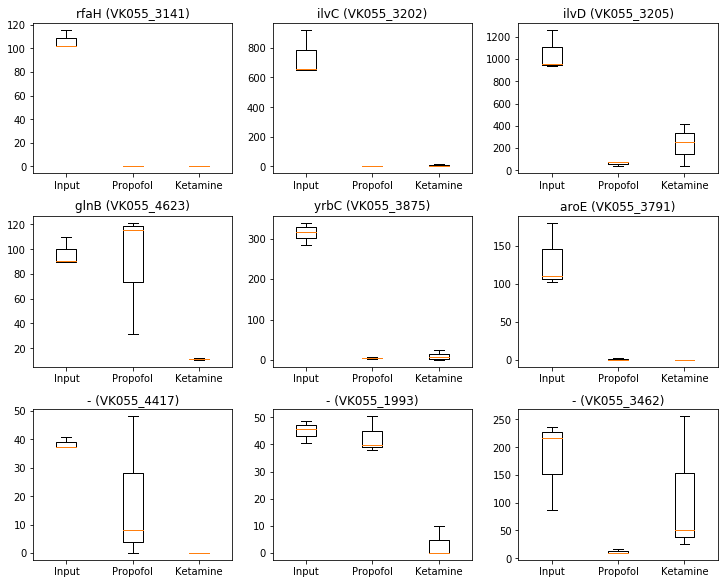

In [112]:
fig_genes = plt.figure(constrained_layout=True, figsize=(10,8))
grid_gene = mpl.gridspec.GridSpec(3,3, figure=fig_genes)
r,c = 0,0
for i,row in found_df.iterrows():

    ax = fig_genes.add_subplot(grid_gene[r,c])
    if c == 2:
        r += 1
        c = 0
    else:
        c += 1
    gene = {
        "Input": list(row.iloc[10:13]),
        "Propofol": list(row.iloc[16:]),
        "Ketamine": list(row.iloc[13:16])
    }
    
    ax.boxplot(list(gene.values()), labels=list(gene.keys()), whis=10)
    if str(row.Gene) == "nan":
        ax.set_title(f"- ({row.name})")
    else:
        ax.set_title(f"{row.Gene} ({row.name})")
    

#### Select Genes Tool
* Use the buttons below to filter genes below the desired Fold-Change (default=0.25) and pvalue (default=0.05)

In [90]:
@interact
def filter_df(condition=['Ketamine', 'Propofol', 'Both'], Fold_Change=widgets.FloatSlider(min=0,max=10,step=0.1, value=1/4) ,
              pvalue=widgets.FloatSlider(min=0,max=0.1,step=0.01, value=0.05)):
    
    if condition == "Both":
        output = deseq_df[ (deseq_df["Propofol" + ' log10FC'] < np.log10(Fold_Change)) & (deseq_df["Propofol" + " padj"] < pvalue)
                         & (deseq_df["Ketamine" + ' log10FC'] < np.log10(Fold_Change)) & (deseq_df["Ketamine" + " padj"] < pvalue)]
    elif condition != "Both":
        output = deseq_df[ (deseq_df[condition + ' log10FC'] < np.log10(Fold_Change)) & (deseq_df[condition + " padj"] < pvalue)]
    
    button = widgets.Button(description="Save genes")
    

    text_box = widgets.Textarea(
        value='',
        placeholder='Filename for saving genes',
        description='Output name:',
        disabled=False
        )

    display(button, text_box)
    def save_genes(b, text_box=text_box):
        output.to_csv(text_box.get_interact_value() + ".csv", sep='\t')
        return
    
    button.on_click(save_genes)
    return output


interactive(children=(Dropdown(description='condition', options=('Ketamine', 'Propofol', 'Both'), value='Ketamine'), FloatSlider(value=0.25, description='Fold_Change', max=10.0), FloatSlider(value=0.05, description='pvalue', max=0.1, step=0.01), Output()), _dom_classes=('widget-interact',))